In [1]:
# IMPORTS #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, cross_val_score

# Data import/Manipulation 

In [2]:
# from kaggle this is a dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
df = pd.read_csv("data/anime_cleaned.csv", usecols=['title','type','source','episodes','rating', 'score', 'scored_by','rank','popularity','members', 'favorites','duration_min','aired_from_year'])
df_number_set = pd.read_csv("data/anime_cleaned.csv", usecols=['episodes', 'score', 'scored_by','rank','popularity','members', 'favorites','duration_min','aired_from_year'])
display(df)
display(df_number_set)

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,24.0,2012.0
1,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,24.0,2007.0
2,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,37129,1508.0,1173,70127,802,24.0,2008.0
3,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,16.0,2002.0
4,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,24.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,Dokidoki Little Ooyasan,OVA,Other,0,Rx - Hentai,9.52,33,NaN,10273,357,21,30.0,2018.0
6664,Wo Shi Jiang Xiaobai (2018),ONA,Original,1,PG-13 - Teens 13 or older,0.00,0,12719.0,10168,384,1,0.0,2018.0
6665,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,G - All Ages,4.20,5,10253.0,14257,37,0,35.0,2015.0
6666,Mr. Men Little Miss,ONA,Picture book,0,G - All Ages,4.57,7,11396.0,14066,49,1,2.0,2013.0


,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,12,7.63,139250,1274.0,231,283882,2809,24.0,2012.0
1,26,7.89,91206,727.0,366,204003,2579,24.0,2007.0
2,51,7.55,37129,1508.0,1173,70127,802,24.0,2008.0
3,38,8.21,36501,307.0,916,93312,3344,16.0,2002.0
4,25,8.67,107767,50.0,426,182765,2082,24.0,2012.0
...,...,...,...,...,...,...,...,...,...
6663,0,9.52,33,NaN,10273,357,21,30.0,2018.0
6664,1,0.00,0,12719.0,10168,384,1,0.0,2018.0
6665,1,4.20,5,10253.0,14257,37,0,35.0,2015.0
6666,0,4.57,7,11396.0,14066,49,1,2.0,2013.0


In [3]:
df.describe(include = "all")

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
count,6668,6668,6668,6668.000000,6668,6668.000000,6.668000e+03,6312.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6668.000000
unique,6668,6,15,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Kare Baka: Wagahai no Kare wa Baka de R,TV,Manga,NaN,PG-13 - Teens 13 or older,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2980,2493,NaN,3396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,14.276395,NaN,6.848998,2.403501e+04,4327.645120,4479.515897,4.749037e+04,670.365627,28.442167,2006.915267
std,NaN,NaN,NaN,40.906929,NaN,0.927448,6.112103e+04,3170.699074,3453.338080,1.051211e+05,3823.072834,25.365980,10.381425
min,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000e+00,1.000000,1.000000,1.800000e+01,0.000000,0.000000,1942.000000
25%,NaN,NaN,NaN,1.000000,NaN,6.350000,6.812500e+02,1710.750000,1691.750000,2.222750e+03,3.000000,17.000000,2003.000000
50%,NaN,NaN,NaN,6.000000,NaN,6.930000,3.966000e+03,3754.500000,3629.500000,1.033650e+04,21.000000,24.000000,2010.000000
75%,NaN,NaN,NaN,13.000000,NaN,7.460000,1.976075e+04,6338.500000,6630.250000,4.336000e+04,142.000000,27.000000,2015.000000


In [4]:
df.isnull().sum()

title                0
type                 0
source               0
episodes             0
rating               0
score                0
scored_by            0
rank               356
popularity           0
members              0
favorites            0
duration_min         0
aired_from_year      0
dtype: int64

In [5]:
# dropping all null values
df.dropna(inplace = True) 


In [6]:
df

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,24.0,2012.0
1,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,24.0,2007.0
2,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,37129,1508.0,1173,70127,802,24.0,2008.0
3,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,16.0,2002.0
4,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,24.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,ONA,Novel,12,PG-13 - Teens 13 or older,7.53,17,11126.0,12779,126,0,13.0,2016.0
6664,Wo Shi Jiang Xiaobai (2018),ONA,Original,1,PG-13 - Teens 13 or older,0.00,0,12719.0,10168,384,1,0.0,2018.0
6665,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,G - All Ages,4.20,5,10253.0,14257,37,0,35.0,2015.0
6666,Mr. Men Little Miss,ONA,Picture book,0,G - All Ages,4.57,7,11396.0,14066,49,1,2.0,2013.0


In [7]:
def change_column_dtype(columns_to_transform,type):
    df[columns_to_transform] = df[columns_to_transform].astype(type)

    return df.dtypes

df.dtypes

title               object
type                object
source              object
episodes             int64
rating              object
score              float64
scored_by            int64
rank               float64
popularity           int64
members              int64
favorites            int64
duration_min       float64
aired_from_year    float64
dtype: object

In [8]:
change_column_dtype(['rank','aired_from_year'],int)


title               object
type                object
source              object
episodes             int64
rating              object
score              float64
scored_by            int64
rank                 int32
popularity           int64
members              int64
favorites            int64
duration_min       float64
aired_from_year      int32
dtype: object

## Creating Dummies for non-numerical data (for columns : Type, Source, Rating)

In [9]:
df

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,ONA,Novel,12,PG-13 - Teens 13 or older,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),ONA,Original,1,PG-13 - Teens 13 or older,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,G - All Ages,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,ONA,Picture book,0,G - All Ages,4.57,7,11396,14066,49,1,2.0,2013


In [10]:
# copy dataframe to replace with dummies columns
df_backup = df.copy()
df_backup

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,ONA,Novel,12,PG-13 - Teens 13 or older,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),ONA,Original,1,PG-13 - Teens 13 or older,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,G - All Ages,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,ONA,Picture book,0,G - All Ages,4.57,7,11396,14066,49,1,2.0,2013


### LabelEncode column ['source']

In [11]:
le = LabelEncoder()
# Created dummies for source column
df_copy = df.copy()
le.fit(df_copy.source)
df_copy.source = le.fit_transform(df_copy.source)


# Made tuple for graphing labels instead of numerical data
df_list_source = list(le.classes_)          # df.source.unique()
print(df_list_source[0] == list(le.inverse_transform([0])),'\n')
df_list_source

False 



['4-koma manga',
 'Book',
 'Card game',
 'Digital manga',
 'Game',
 'Light novel',
 'Manga',
 'Music',
 'Novel',
 'Original',
 'Other',
 'Picture book',
 'Radio',
 'Visual novel',
 'Web manga']

In [12]:
# df_list_source[0] == list(le.inverse_transform([0]))

In [13]:
# Auto encodes any categorical column in a dataframe to numerical values.

def dummyEncode_column(column):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df[f'{column.name}'] = le.fit_transform(df[f'{column.name}'])
    globals() [f'df_{column.name}_categories'] = list(le.classes_)
    
    print(f'After passing column ["{column.name}"] through LabelEncoder(): \n')
    
    for i in range(0,len(list(le.classes_))):
        print(f'Categorical value {le.inverse_transform([i])} is replaced with numerical value {[i]}')   
    
    print(f'\n[df_{column.name}_categories] = ', globals() [f'df_{column.name}_categories'])
    
    display(df)


In [14]:
dummyEncode_column(df.source)

After passing column ["source"] through LabelEncoder(): 

Categorical value ['4-koma manga'] is replaced with numerical value [0]
Categorical value ['Book'] is replaced with numerical value [1]
Categorical value ['Card game'] is replaced with numerical value [2]
Categorical value ['Digital manga'] is replaced with numerical value [3]
Categorical value ['Game'] is replaced with numerical value [4]
Categorical value ['Light novel'] is replaced with numerical value [5]
Categorical value ['Manga'] is replaced with numerical value [6]
Categorical value ['Music'] is replaced with numerical value [7]
Categorical value ['Novel'] is replaced with numerical value [8]
Categorical value ['Original'] is replaced with numerical value [9]
Categorical value ['Other'] is replaced with numerical value [10]
Categorical value ['Picture book'] is replaced with numerical value [11]
Categorical value ['Radio'] is replaced with numerical value [12]
Categorical value ['Visual novel'] is replaced with numerical

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,TV,6,12,PG-13 - Teens 13 or older,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,TV,6,26,PG-13 - Teens 13 or older,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,TV,6,51,PG - Children,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,TV,9,38,PG-13 - Teens 13 or older,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,TV,6,25,PG-13 - Teens 13 or older,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,ONA,8,12,PG-13 - Teens 13 or older,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),ONA,9,1,PG-13 - Teens 13 or older,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,OVA,9,1,G - All Ages,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,ONA,11,0,G - All Ages,4.57,7,11396,14066,49,1,2.0,2013


### LabelEncode column ['type']

In [15]:
dummyEncode_column(df.type)

After passing column ["type"] through LabelEncoder(): 

Categorical value ['Movie'] is replaced with numerical value [0]
Categorical value ['Music'] is replaced with numerical value [1]
Categorical value ['ONA'] is replaced with numerical value [2]
Categorical value ['OVA'] is replaced with numerical value [3]
Categorical value ['Special'] is replaced with numerical value [4]
Categorical value ['TV'] is replaced with numerical value [5]

[df_type_categories] =  ['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV']


,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,5,6,12,PG-13 - Teens 13 or older,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,5,6,26,PG-13 - Teens 13 or older,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,5,6,51,PG - Children,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,5,9,38,PG-13 - Teens 13 or older,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,5,6,25,PG-13 - Teens 13 or older,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,2,8,12,PG-13 - Teens 13 or older,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),2,9,1,PG-13 - Teens 13 or older,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,3,9,1,G - All Ages,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,2,11,0,G - All Ages,4.57,7,11396,14066,49,1,2.0,2013


In [16]:
# # Created dummies for type column
# le.fit(df.type)
# df.type = le.fit_transform(df.type)
# # le.fit_transform(df.type)


# # Made tuple for graphing labels instead of numerical data
# df_list_type = list(le.classes_)                           # df.type.unique()

# print(list(le.classes_))

# print(list(le.inverse_transform([0,1,2,3,4,5])))

### LabelEncode column ['rating']

In [17]:
dummyEncode_column(df.rating)

After passing column ["rating"] through LabelEncoder(): 

Categorical value ['G - All Ages'] is replaced with numerical value [0]
Categorical value ['None'] is replaced with numerical value [1]
Categorical value ['PG - Children'] is replaced with numerical value [2]
Categorical value ['PG-13 - Teens 13 or older'] is replaced with numerical value [3]
Categorical value ['R - 17+ (violence & profanity)'] is replaced with numerical value [4]
Categorical value ['R+ - Mild Nudity'] is replaced with numerical value [5]
Categorical value ['Rx - Hentai'] is replaced with numerical value [6]

[df_rating_categories] =  ['G - All Ages', 'None', 'PG - Children', 'PG-13 - Teens 13 or older', 'R - 17+ (violence & profanity)', 'R+ - Mild Nudity', 'Rx - Hentai']


,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,5,6,12,3,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,5,6,26,3,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,5,6,51,2,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,5,9,38,3,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,5,6,25,3,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,2,8,12,3,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),2,9,1,3,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,3,9,1,0,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,2,11,0,0,4.57,7,11396,14066,49,1,2.0,2013


In [18]:
# Created dummies for rating column
le.fit(df.rating)
df.rating = le.fit_transform(df.rating)


# Made tuple for graphing labels instead of numerical data
df_list_rating = list(le.classes_)                   # df.rating.unique()

In [19]:
df_list_rating

[0, 1, 2, 3, 4, 5, 6]

In [20]:
df

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,5,6,12,3,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,5,6,26,3,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,5,6,51,2,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,5,9,38,3,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,5,6,25,3,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,2,8,12,3,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),2,9,1,3,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,3,9,1,0,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,2,11,0,0,4.57,7,11396,14066,49,1,2.0,2013


In [32]:
df.to_csv('data/final_df.csv')

# EDA

## Correlation

In [21]:

df_predictors = df.iloc[:,1:-1]
corr= df_predictors.corr()
corr

,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min
type,1.000000,-0.029381,0.237192,0.114962,0.061996,0.146847,-0.062197,-0.195254,0.179783,0.105838,-0.548018
source,-0.029381,1.000000,-0.015172,-0.065669,-0.155177,-0.047142,0.169341,0.135183,-0.050129,-0.000246,-0.046960
episodes,0.237192,-0.015172,1.000000,-0.085536,0.073116,0.063172,-0.049064,-0.005915,0.073563,0.104417,-0.107056
rating,0.114962,-0.065669,-0.085536,1.000000,0.267665,0.194191,-0.310402,-0.505422,0.219982,0.088242,0.093910
score,0.061996,-0.155177,0.073116,0.267665,1.000000,0.382646,-0.898747,-0.691818,0.416384,0.257017,0.303784
scored_by,0.146847,-0.047142,0.063172,0.194191,0.382646,1.000000,-0.356686,-0.424704,0.987066,0.794090,0.045479
rank,-0.062197,0.169341,-0.049064,-0.310402,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503,-0.294528
popularity,-0.195254,0.135183,-0.005915,-0.505422,-0.691818,-0.424704,0.777302,1.000000,-0.474118,-0.210061,-0.159520
members,0.179783,-0.050129,0.073563,0.219982,0.416384,0.987066,-0.391524,-0.474118,1.000000,0.781962,0.038604
favorites,0.105838,-0.000246,0.104417,0.088242,0.257017,0.794090,-0.208503,-0.210061,0.781962,1.000000,0.002212


<AxesSubplot:>

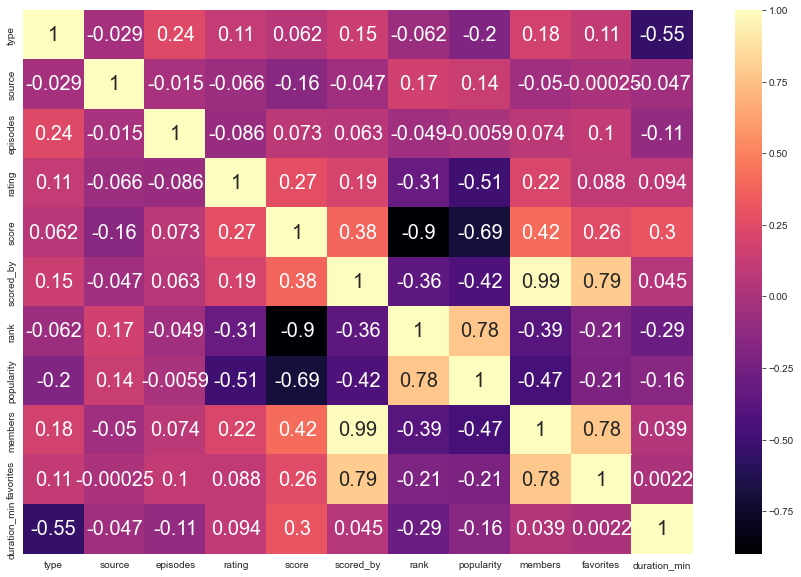

In [22]:
# Graphed the correlation matrix using a heat map (easier to read)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, annot_kws ={'size':20}, cmap='magma')


In [23]:
# Checking correlations in data where the correlation is greater then 75% (highly correlated)
corr[abs(df_predictors.corr() > 0.75)]

,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min
type,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
scored_by,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.987066,0.794090,NaN
rank,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.777302,NaN,NaN,NaN
popularity,NaN,NaN,NaN,NaN,NaN,NaN,0.777302,1.000000,NaN,NaN,NaN
members,NaN,NaN,NaN,NaN,NaN,0.987066,NaN,NaN,1.000000,0.781962,NaN
favorites,NaN,NaN,NaN,NaN,NaN,0.794090,NaN,NaN,0.781962,1.000000,NaN


<AxesSubplot:>

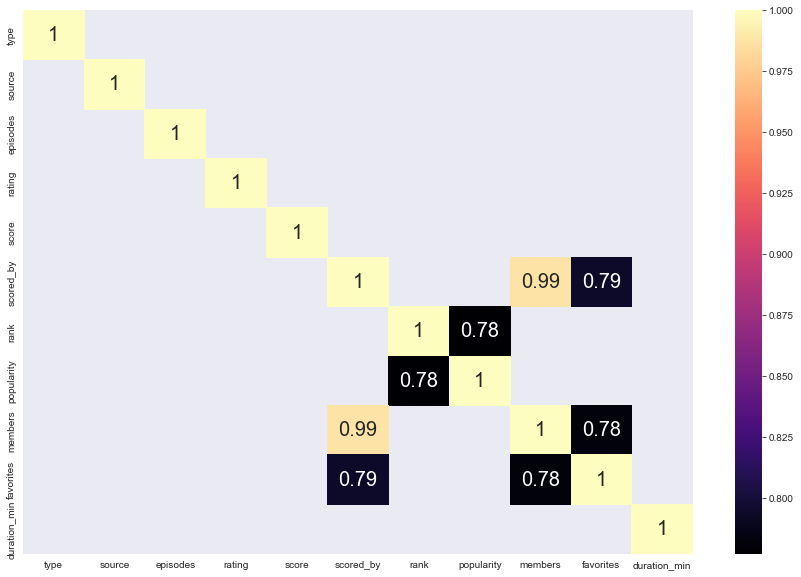

In [24]:
# Graphed the correlation matrix using a heat map (easier to read)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr[abs(df_predictors.corr() > 0.75)], annot = True, annot_kws ={'size':20}, cmap='magma')

In [25]:
# Checking correlations in data where the correlation is less then -75% (highly inversely correlated)
corr[abs(df_predictors.corr() < -0.75)] 

,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,NaN,NaN,-0.898747,NaN,NaN,NaN,NaN
scored_by,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank,NaN,NaN,NaN,NaN,-0.898747,NaN,NaN,NaN,NaN,NaN,NaN
popularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
members,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorites,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

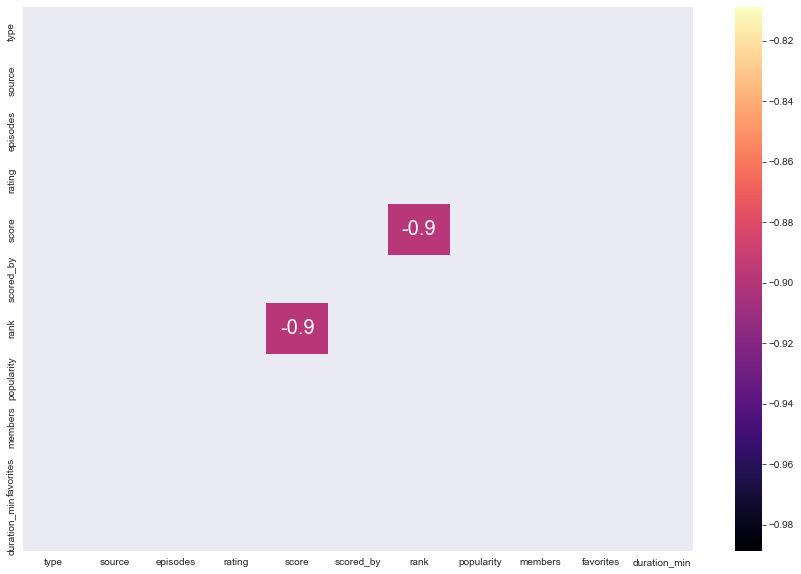

In [26]:
# Graphed the correlation matrix using a heat map (easier to read)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr[abs(df_predictors.corr() < -0.75)] , annot = True, annot_kws ={'size':20}, cmap='magma')

In [27]:
X = df.drop(['title','score'],axis=1)
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)


In [28]:
def get_stats():
    columns_used = [X.columns[i] for i,value in enumerate(X.columns)]
    x = X[columns_used]
    return sm.OLS(y,x).fit().summary()
    
get_stats()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  score   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.692e+05
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                        0.00
Time:                        12:23:10   Log-Likelihood:                         -3211.5
No. Observations:                6312   AIC:                                      6445.
Df Residuals:                    6301   BIC:                                      6519.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
type                0.0226      0.004      5.987      0.000       0.015       0.030
source             -0.0020      0.002     -1.050      0.294      -0.006       0.002
episodes            0.0006      0.000      4.492      0.000       0.000       0.001
rating             -0.0045      0.004     -1.055      0.291      -0.013       0.004
scored_by       -2.351e-06   5.45e-07     -4.315      0.000   -3.42e-06   -1.28e-06
rank               -0.0003   2.71e-06    -96.847      0.000      -0.000      -0.000
popularity       1.795e-05   2.79e-06      6.424      0.000    1.25e-05    2.34e-05
members          1.792e-06   3.24e-07      5.527      0.000    1.16e-06    2.43e-06
favorites        1.009e-05    2.2e-06      4.578      0.000    5.77e-06    1.44e-05
duration_min        0.0031      0.000     12.399      0.000       0.003       0.004
aired_from_year     0.0039    1.5e-05    257.337      0.000       0.004       0.004
==============================================================================
Omnibus:                     2972.171   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           427384.221
Skew:                          -1.212   Prob(JB):                         0.00
Kurtosis:                      43.239   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# # Removing all features with a p-value higher then alpha (0.05) from above OLM summary
# # all remaining variables are said to be statistically significant.
# X = X.drop(['source','rating'],axis=1

In [30]:
X.head()

,type,source,episodes,rating,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,5,6,12,3,139250,1274,231,283882,2809,24.0,2012
1,5,6,26,3,91206,727,366,204003,2579,24.0,2007
2,5,6,51,2,37129,1508,1173,70127,802,24.0,2008
3,5,9,38,3,36501,307,916,93312,3344,16.0,2002
4,5,6,25,3,107767,50,426,182765,2082,24.0,2012


## Checking the relationships between the different categories

Visualizing relationship with each column of my dataset

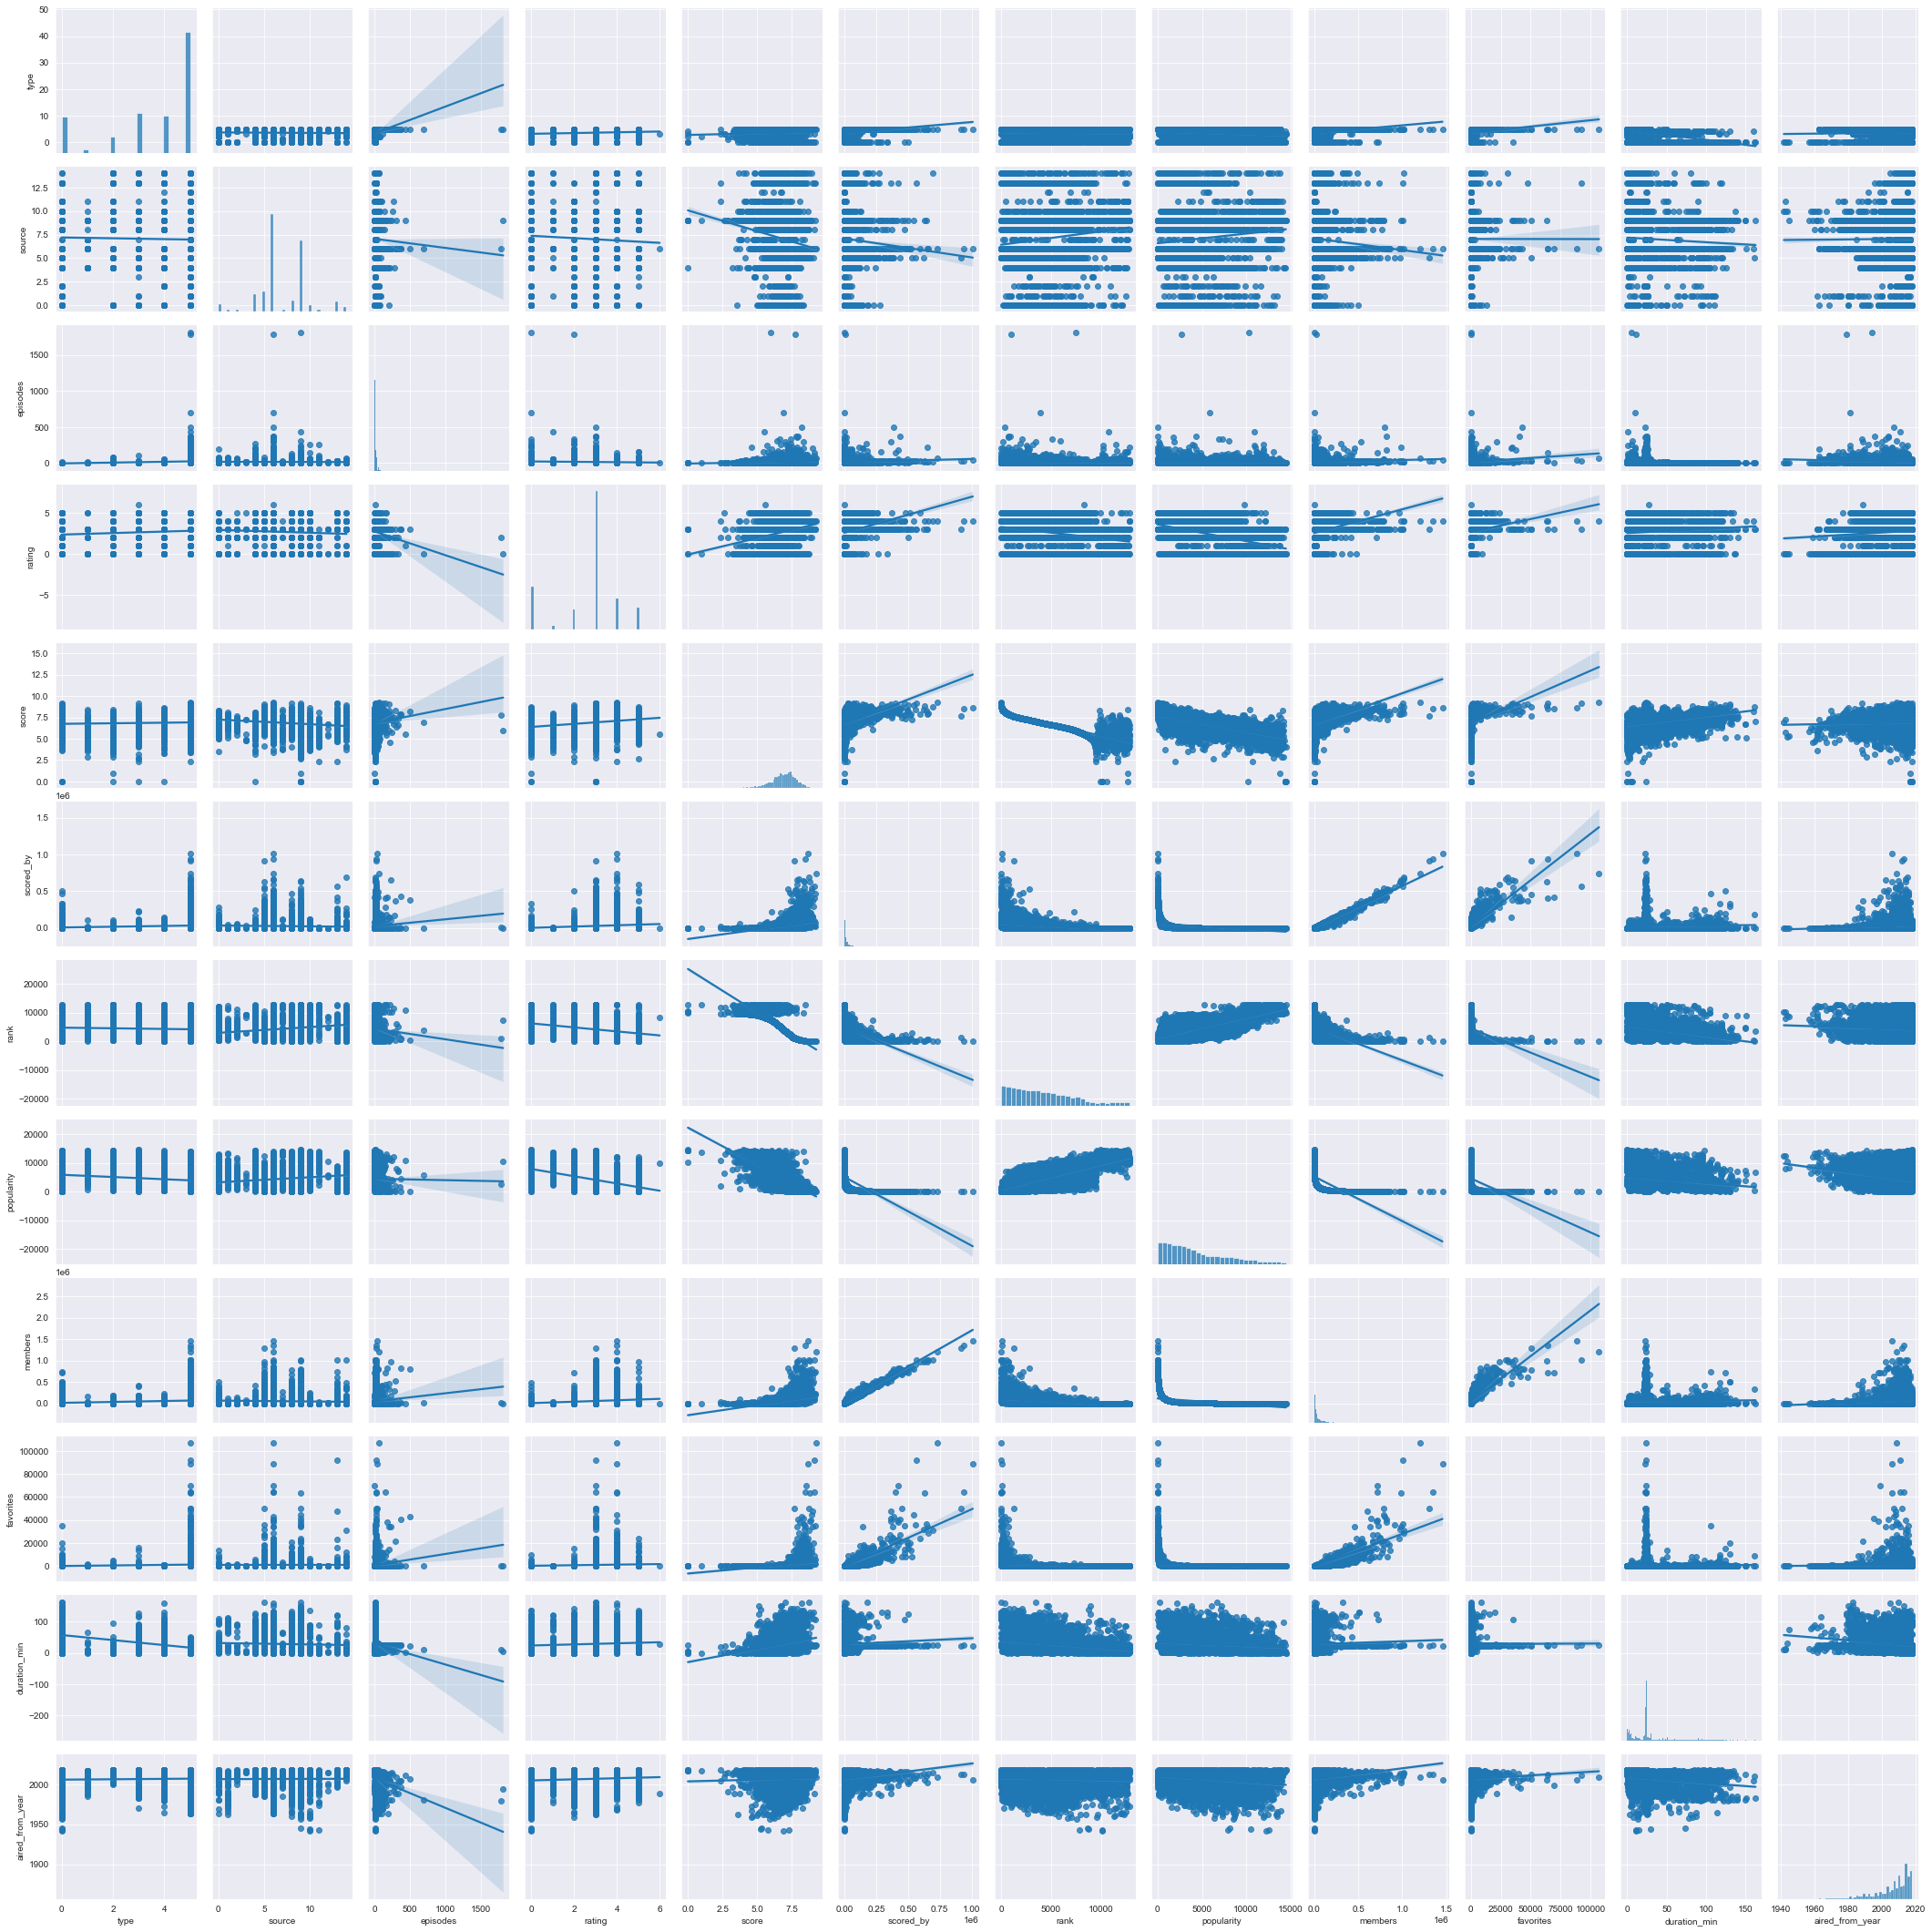

In [33]:
sns.pairplot(df, kind='reg')

Box plot of the relationship for type against rank and score

([<matplotlib.axis.XTick at 0x152cd6c3448>,
 [Text(0, 0, 'Movie'),
  Text(1, 0, 'Music'),
  Text(2, 0, 'ONA'),
  Text(3, 0, 'OVA'),
  Text(4, 0, 'Special'),
  Text(5, 0, 'TV')])

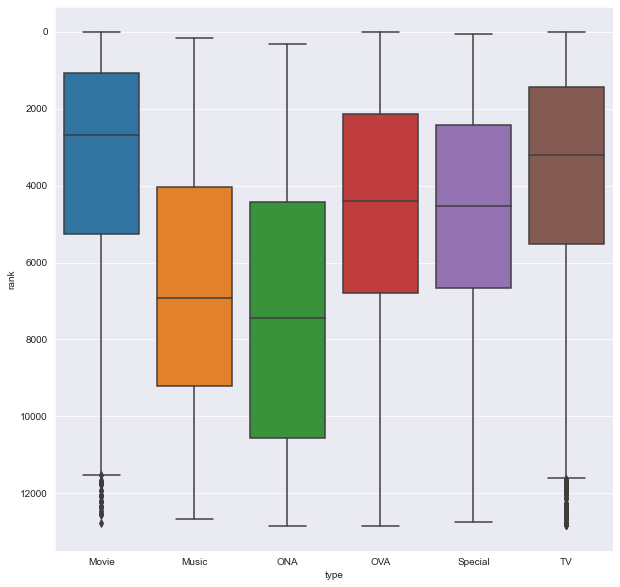

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df, x='type' ,y= 'rank', orient='v')
plt.gca().invert_yaxis()
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

([<matplotlib.axis.XTick at 0x152cdbeabc8>,
 [Text(0, 0, 'Movie'),
  Text(1, 0, 'Music'),
  Text(2, 0, 'ONA'),
  Text(3, 0, 'OVA'),
  Text(4, 0, 'Special'),
  Text(5, 0, 'TV')])

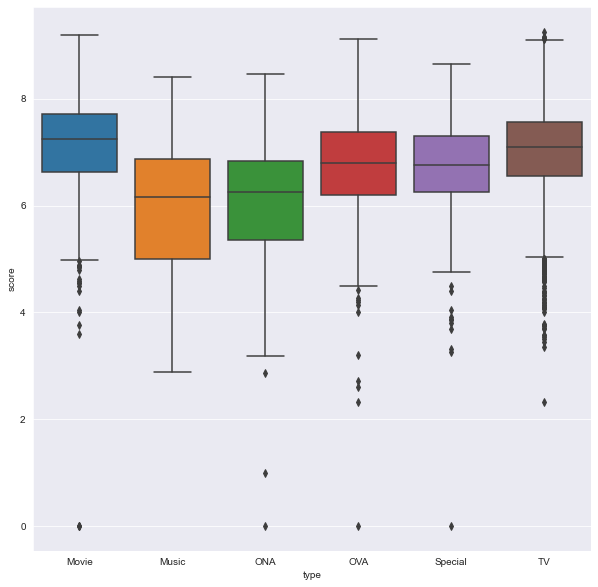

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df, x='type' ,y= 'score', orient='v', )
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

Swarmplot of the relationship between the source and score with the different colors showing the rating (where 0 is all ages and brown is R+)

C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.6% of the points 

([<matplotlib.axis.XTick at 0x152ce28be08>,
 [Text(0, 0, '4-koma manga'),
  Text(1, 0, 'Book'),
  Text(2, 0, 'Card game'),
  Text(3, 0, 'Digital manga'),
  Text(4, 0, 'Game'),
  Text(5, 0, 'Light novel'),
  Text(6, 0, 'Manga'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'Novel'),
  Text(9, 0, 'Original'),
  Text(10, 0, 'Other'),
  Text(11, 0, 'Picture book'),
  Text(12, 0, 'Radio'),
  Text(13, 0, 'Visual novel'),
  Text(14, 0, 'Web manga')])

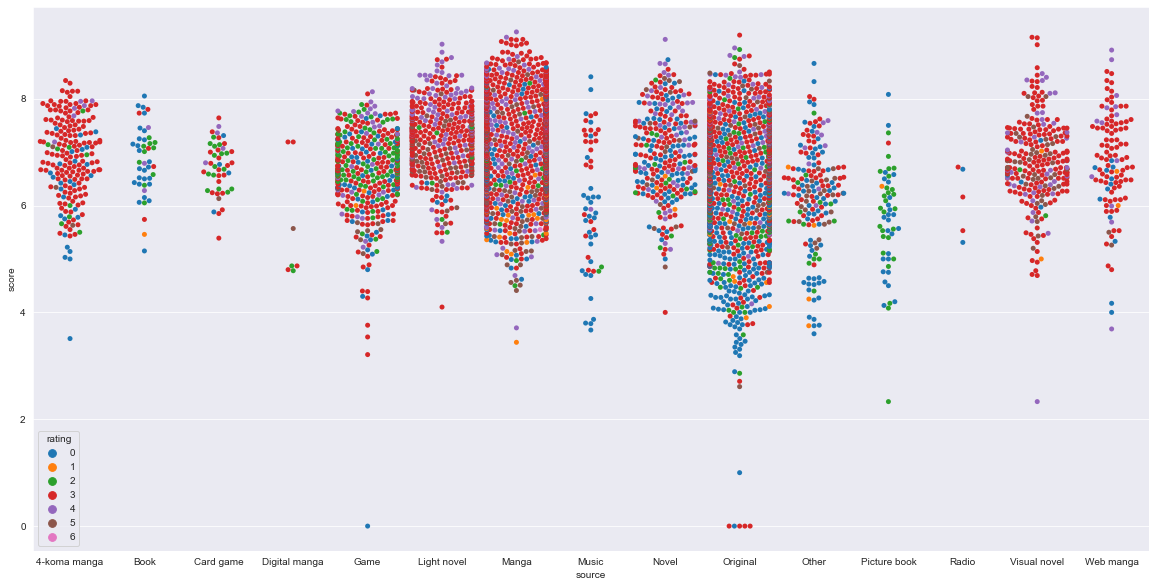

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=df, x='source' ,y= 'score', size=5, orient='v', hue='rating')
plt.xticks(np.arange(len(df_list_source)), df_list_source)


In [47]:
# sns.pairplot(df_number_set)

C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

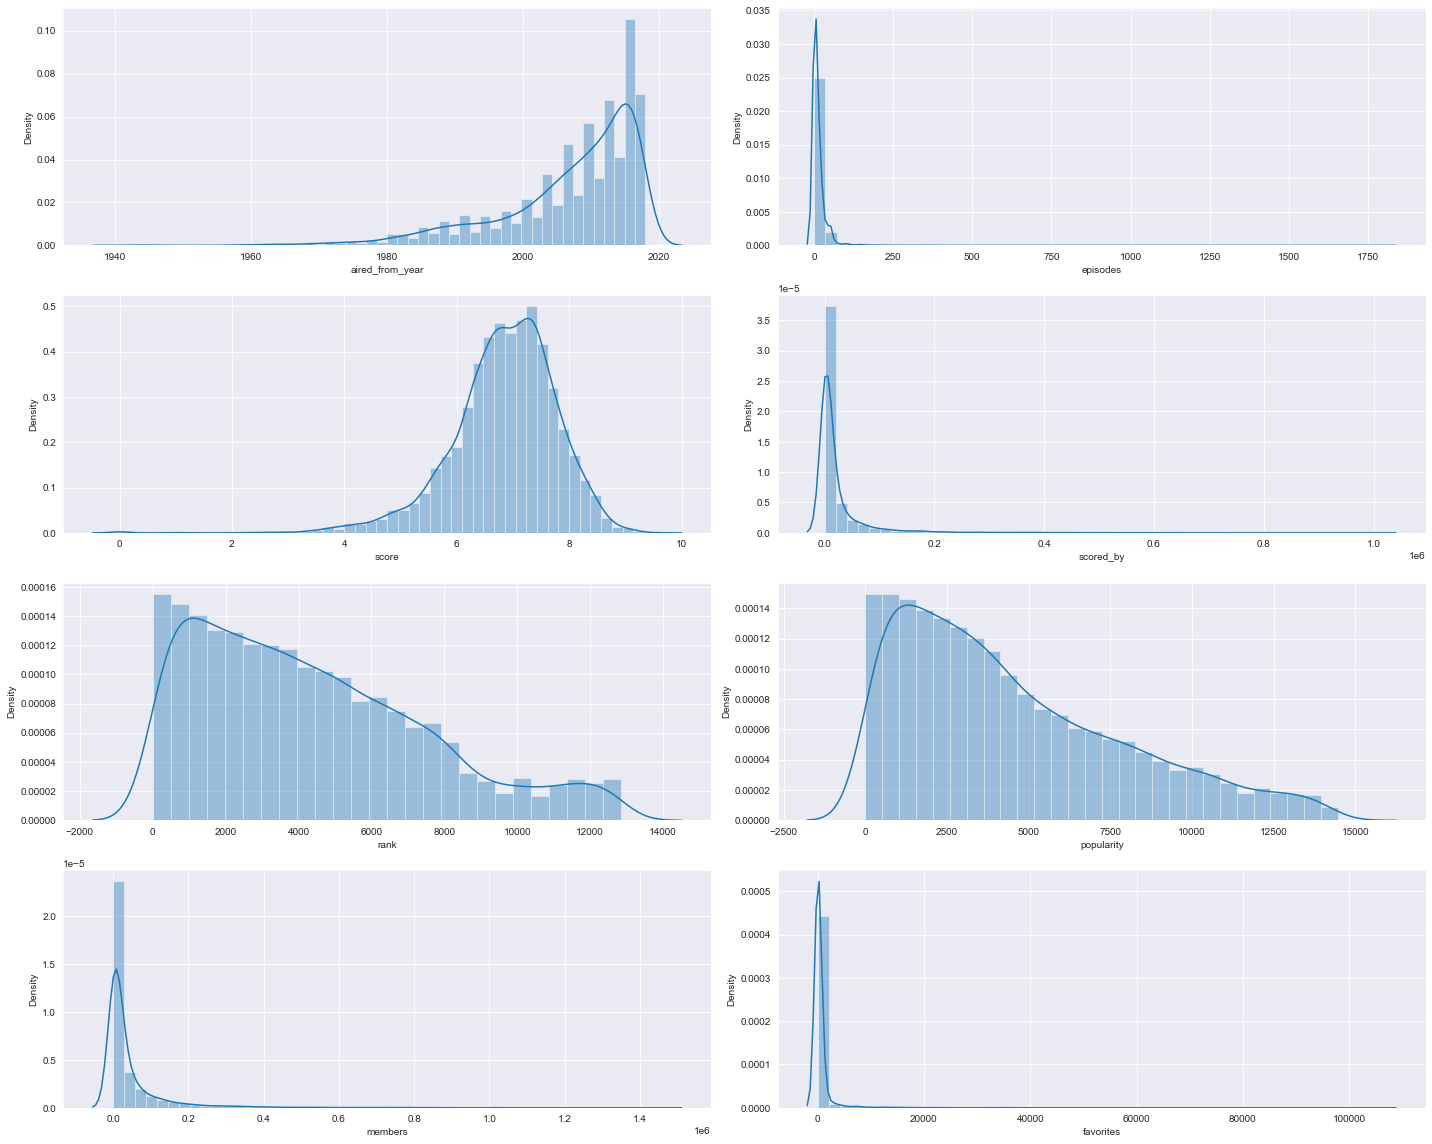

In [38]:
rows = 4
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = df_number_set.columns.dropna()
index = -1
for i in range(rows):
    for j in range(cols):
        sns.distplot(df_number_set[col[index]].dropna(how='all'), ax = ax[i][j])
        index = index + 1
plt.tight_layout()

C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='aired_from_year', ylabel='Density'>

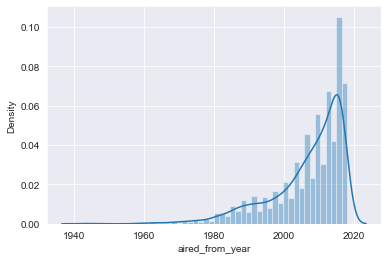

In [39]:
sns.distplot(df.aired_from_year)

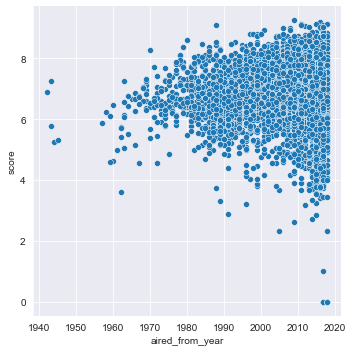

In [40]:
sns.relplot(data=df, x="aired_from_year", y="score")

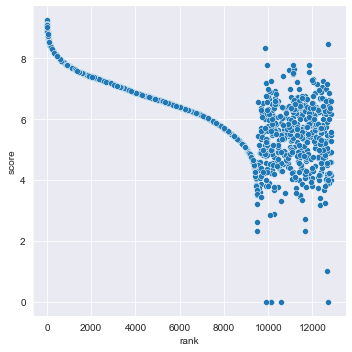

In [41]:
sns.relplot(data=df, x="rank", y="score")

In [42]:
high_scored_anime = df[df['score']>=8]
high_scored_anime = high_scored_anime.loc[:]
high_scored_anime

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
3,Princess Tutu,5,9,38,3,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,5,6,25,3,8.67,107767,50,426,182765,2082,24.0,2012
5,Yume-iro Pâtissière,5,6,50,0,8.03,21618,526,1630,45625,826,24.0,2009
8,Nodame Cantabile: Paris-hen,5,6,11,3,8.24,53908,281,988,85660,282,23.0,2008
9,Ouran Koukou Host Club,5,6,26,3,8.34,335137,205,69,538843,24072,23.0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6558,No Game No Life: Zero,0,5,1,3,8.74,78743,40,320,225372,3008,106.0,2017
6559,Ookiku Furikabutte,5,6,25,3,8.06,25390,479,1340,60550,1474,25.0,2007
6579,Code Geass: Hangyaku no Lelouch,5,9,25,4,8.79,627740,30,9,986897,63614,24.0,2006
6582,Kara no Kyoukai: Mirai Fukuin,0,5,1,4,8.09,25600,447,1408,56473,146,90.0,2013


In [43]:
high_scored_anime.describe()

,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
count,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02,547.000000,547.000000,5.470000e+02,547.000000,547.000000,547.000000
mean,3.625229,6.910420,20.140768,3.133455,8.309927,1.091520e+05,317.603291,1061.166362,2.029176e+05,5442.442413,41.475320,2009.142596
std,2.008303,2.209955,35.850273,0.982687,0.253982,1.369647e+05,689.024897,1235.901747,2.229745e+05,11565.495061,33.916954,7.861074
min,0.000000,0.000000,0.000000,0.000000,8.000000,6.000000e+00,1.000000,1.000000,3.800000e+01,0.000000,2.000000,1970.000000
25%,3.000000,6.000000,1.000000,3.000000,8.120000,2.422150e+04,137.500000,253.500000,5.363050e+04,309.500000,23.000000,2006.000000
50%,5.000000,6.000000,12.000000,3.000000,8.240000,6.056000e+04,277.000000,674.000000,1.247070e+05,1244.000000,24.000000,2011.000000
75%,5.000000,8.000000,25.000000,4.000000,8.445000,1.356615e+05,417.500000,1465.500000,2.693230e+05,4886.500000,42.500000,2015.000000
max,5.000000,14.000000,500.000000,5.000000,9.250000,1.009477e+06,12681.000000,14119.000000,1.456378e+06,106895.000000,162.000000,2018.000000


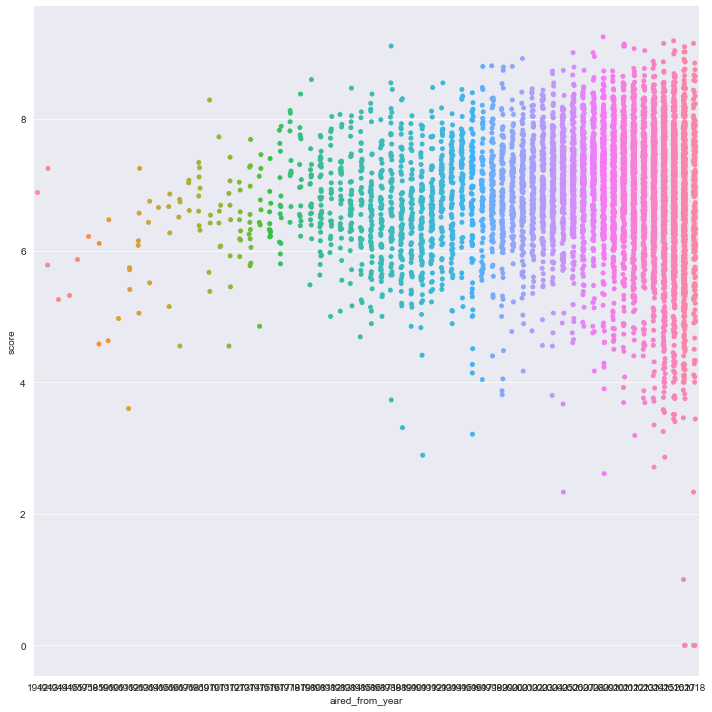

In [44]:
high_score_count = pd.DataFrame(high_scored_anime['score'].value_counts()).reset_index()

sns.catplot(data = df,x="aired_from_year", y="score",height=10)


In [45]:
low_scored_anime = df[df['score']<=3]
low_scored_anime = low_scored_anime.loc[:]
low_scored_anime

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
1781,Abunai Sisters: Koko & Mika,3,9,10,5,2.61,1217,9510,6321,2572,19,3.00,2009
2373,Gum Shaara,1,9,1,0,2.89,9,10283,14241,31,0,2.00,1991
4057,Hametsu no Mars,3,13,1,4,2.33,24281,9514,1949,34524,202,19.00,2005
4695,Oshiri Tantei,5,11,3,2,2.33,3,11659,10713,261,0,0.00,2018
5988,Ore to Issho ni Training,3,9,1,3,2.71,7,11643,13078,95,0,22.00,2014
6625,Fettu to Ccine to Gummi Seijin,2,9,1,2,2.86,14,10084,13979,48,0,3.00,2015
6636,Woo to Wah,2,9,0,0,1.00,3,12678,13790,62,0,0.25,2017
6640,Inazuma Eleven Reloaded: Reformation of Soccer,4,4,1,0,0.00,0,10587,14429,610,0,24.00,2018
6644,Free!: Take Your Marks: Character Butai Aisatsu,0,9,4,3,0.00,0,10120,14427,364,0,6.00,2017
6648,Free! Movie 2: Timeless Medley - Yakusoku: Cha...,0,9,4,3,0.00,0,10119,14426,261,0,5.00,2017


<AxesSubplot:xlabel='index'>

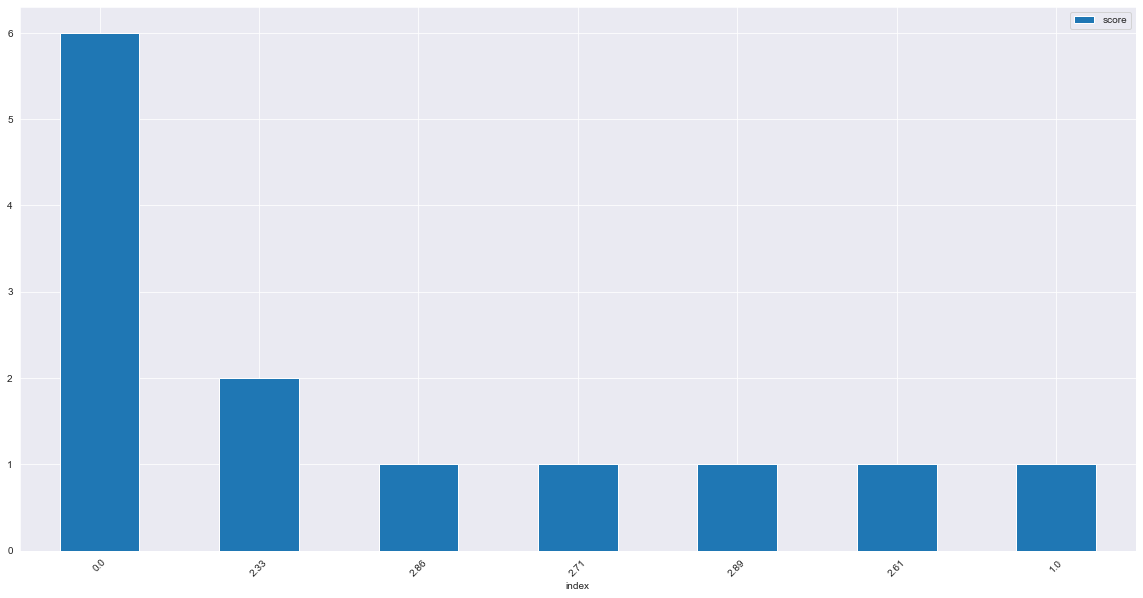

In [46]:
low_score_count = pd.DataFrame(low_scored_anime['score'].value_counts()).reset_index()

low_score_count.plot(x="index", y="score", kind="bar",rot =45,figsize=(20,10))